In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

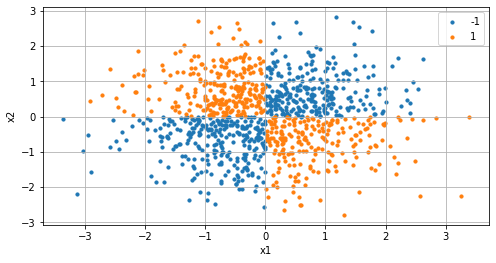

In [ ]:
# Create a XOR dataset
X = np.random.randn(1000, 2)
Y = np.array([1 if int(np.logical_xor(x[0] > 0, x[1] > 0)) else -1 for x in X])

plt.figure(figsize=(8, 4))
plt.scatter(X[Y==-1, 0], X[Y==-1, 1], s=10, label='-1')
plt.scatter(X[Y==1, 0], X[Y==1, 1], s=10, label='1')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(810, 2)
(90, 2)
(100, 2)
(810,)
(90,)
(100,)


# Part 2: Classification

In [ ]:
# Create a linear SVM and train it
lin_svm = SVC(kernel='linear')
lin_svm.fit(x_train, y_train)

# Print performance
print(f"Training mean accuracy: {lin_svm.score(x_train, y_train):6.4f}")
print(f"Test mean accuracy: {lin_svm.score(x_val, y_val):6.4f}")

Training mean accuracy: 0.5309
Test mean accuracy: 0.5222


In [ ]:
# Encuentra el mejor SVM utilizando grid search
# Guíate por el desempeño en el set de entrenamiento y validación.
# Prueba los siguientes hyperparámetros.
# kernel = linear, polynomial, rbf
# C = 0.001, 0.01, 0.1, 1.0, 10, 100
# grado del polinomio = 1, 2, 3, 4, 5, 6 (solo para el kernel polinomial)
# gamma = auto, scale
# coef0 (r) = 0, 1/4, 1/2, 1, 2

In [ ]:
# Define grid search parameters


In [ ]:
# Create and train the classifiers with grid search
gs = GridSearchCV(SVC(), param_grid)
gs.fit(x_train, y_train)

In [ ]:
# Print info about best score and best hyperparameters
print(f"Best score: {gs.best_score_:.4f}")
print(f"Best params: {gs.best_params_}")

Best score: 0.9864
Best params: {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}


In [ ]:
# Evaluate on the test set
best_svm = gs.best_estimator_
best_svm.fit(x_train, y_train)

print(f"Train mean accuracy: {best_svm.score(x_train, y_train):.3f}")
print(f"Validation mean accuracy: {best_svm.score(x_val, y_val):.3f}")
print(f"Test mean accuracy: {best_svm.score(x_test, y_test):.3f}")

Train mean accuracy: 0.986
Validation mean accuracy: 0.967
Test mean accuracy: 0.970
